<a href="https://colab.research.google.com/github/ksy3432/ai-class-DL-Application-/blob/main/DLA_week1_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 당뇨병 데이터를 이용하여 머신러닝 5가지 분류 수행(SVM, LR, RF, DT, KNN)

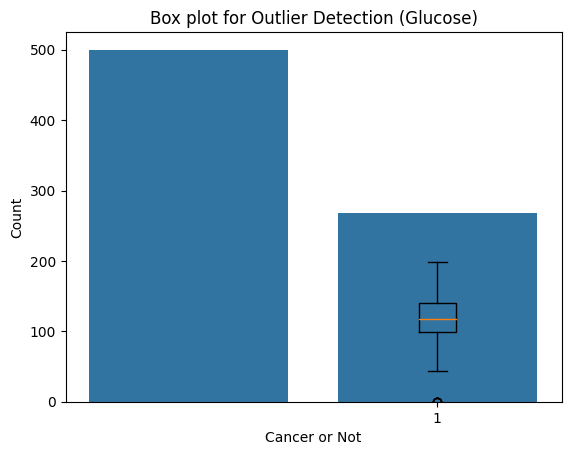

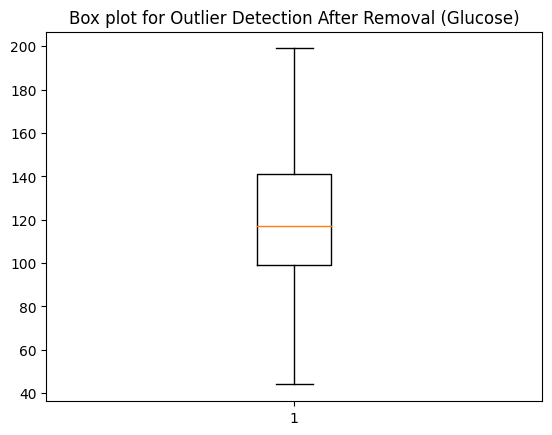

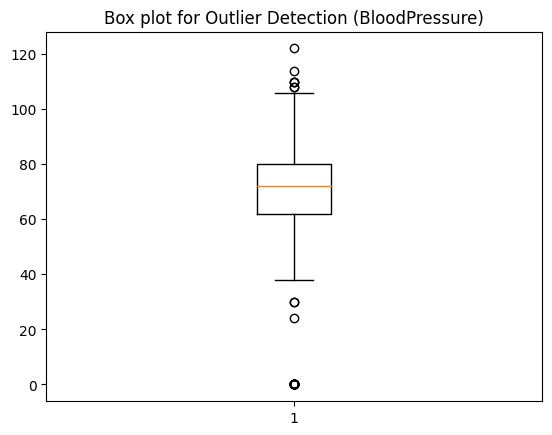

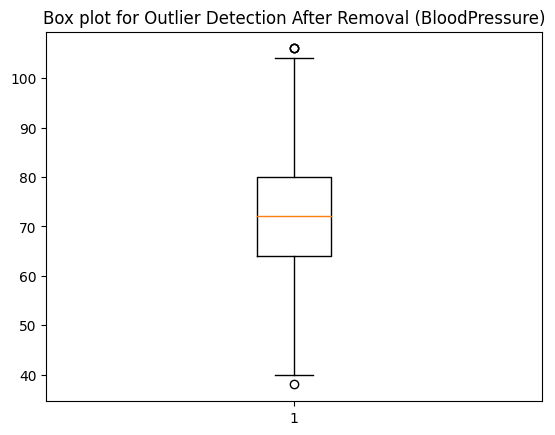

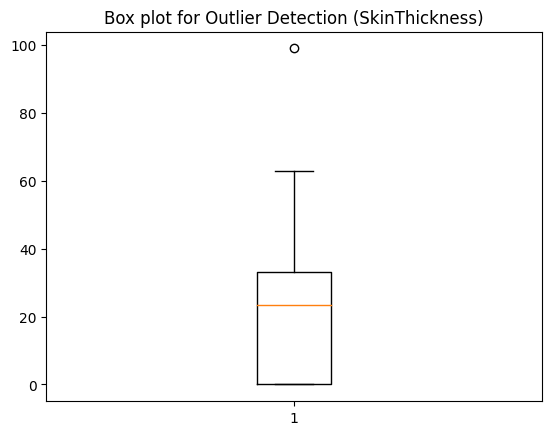

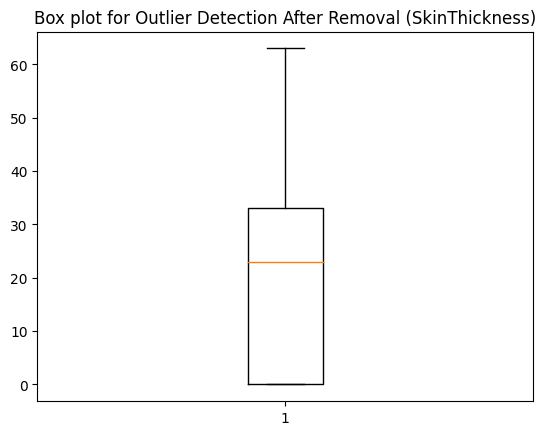

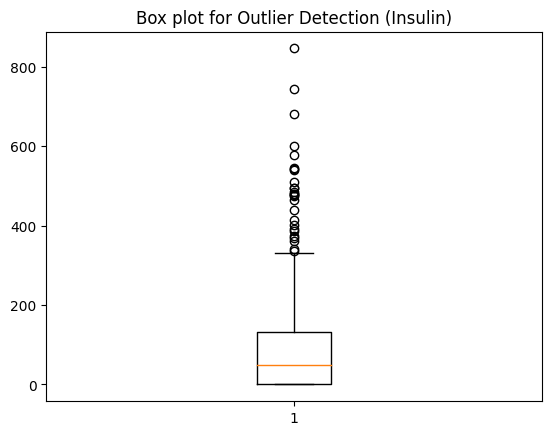

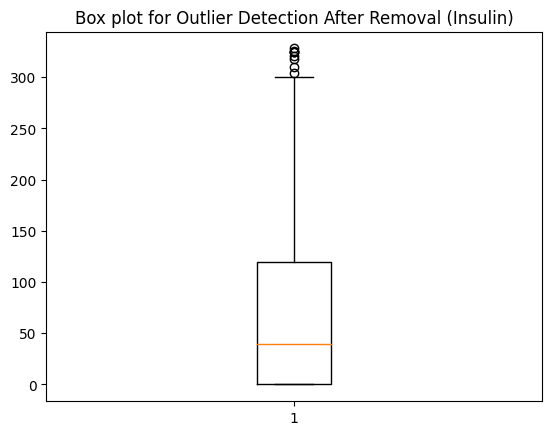

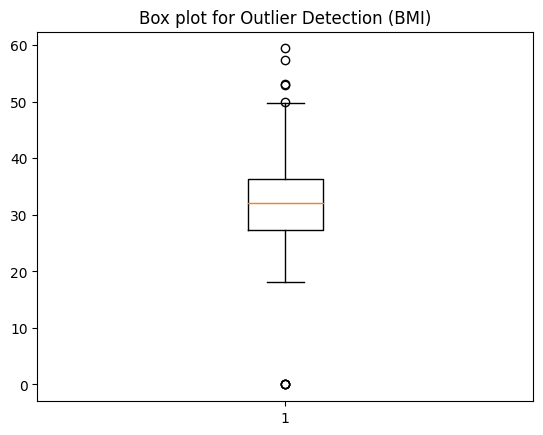

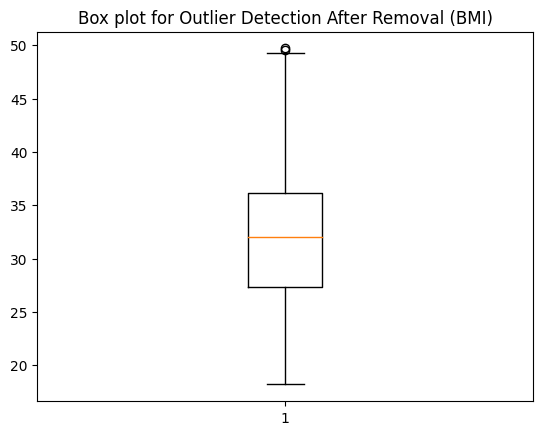

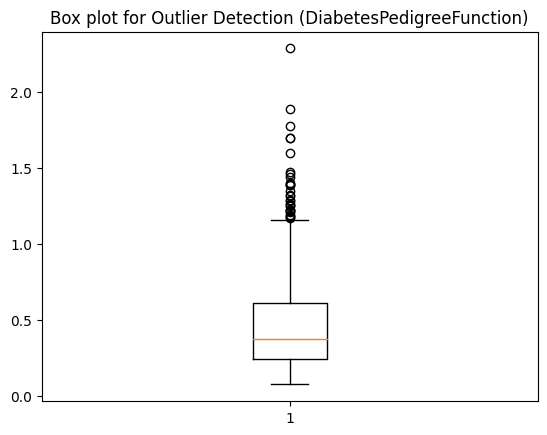

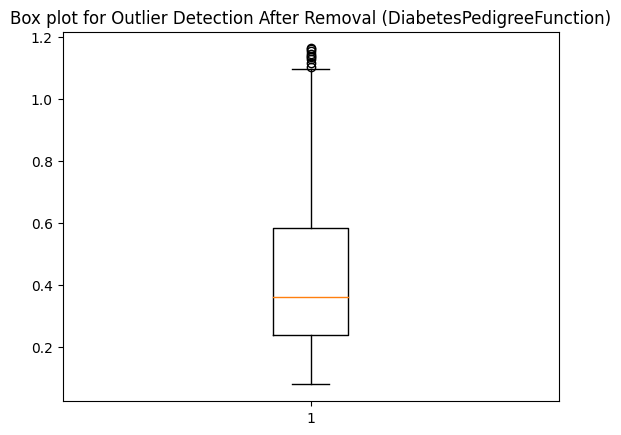

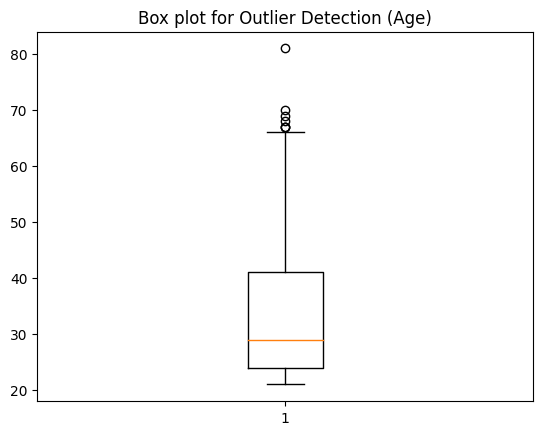

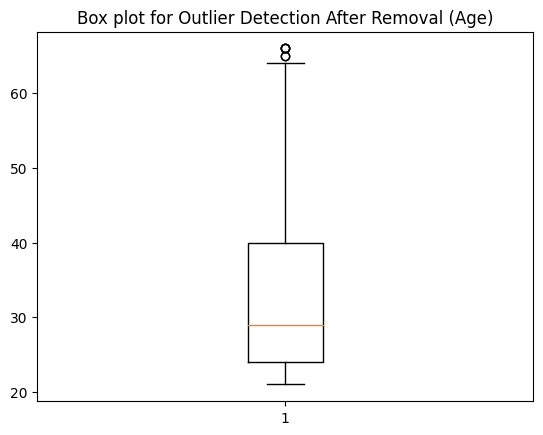

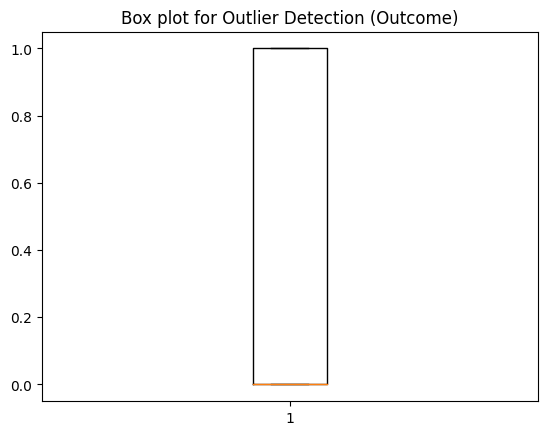

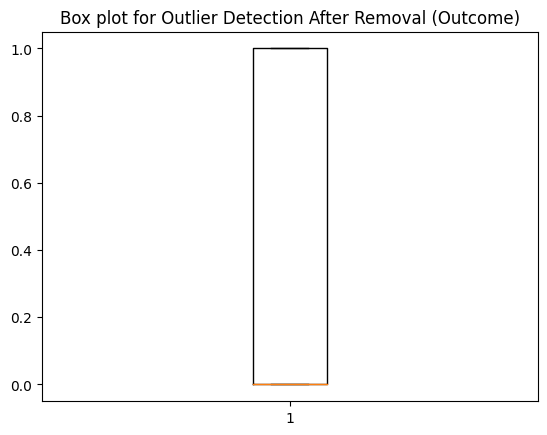

훈련 세트 크기: (386, 7)
검증 세트 크기: (129, 7)
테스트 세트 크기: (129, 7)

--- SVM Classifier ---
0.7364341085271318
[[85  6]
 [28 10]]

--- Logistic Regression Classifier ---
0.7364341085271318
[[81 10]
 [24 14]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Neural Network Classifier ---
0.7364341085271318
[[81 10]
 [24 14]]

--- Decision Tree Classifier ---
0.7054263565891473
[[73 18]
 [20 18]]

--- Radom Forest ---
0.751937984496124
[[81 10]
 [22 16]]


In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/drive/MyDrive/diabetes.csv", index_col=0)
df

df.columns
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

# 결측치 확인
df.isnull().sum()

# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

# 결측치 제거
df = df.dropna()
df.isnull().sum()

# 범주형 변수와 수치형 변수 구분
# categorical_features = ['Sex']
# numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# 전처리 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # 수치형 데이터 표준화
        # ('cat', OneHotEncoder(), categorical_features)  # 범주형 데이터 원핫 인코딩
    ])

# 이상치 탐지 및 제거 함수
def outlier(df, labels):
    for label in labels:
        # 박스 플롯을 이용해 이상치 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        # IQR 계산을 통한 이상치 경계 설정
        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치 제거
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

        # 이상치 제거 후 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection After Removal ({label})')
        plt.show()

    return df

# 사용할 레이블 리스트 정의
labels = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# 이상치 제거 후 데이터셋 반환
df_cleaned = outlier(df, labels)

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
# 데이터 전처리
X = df_cleaned.drop(['Outcome'], axis=1)
y = df_cleaned['Outcome']

X_processed = preprocessor.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

# 2. 딥러닝 수행하기

결측값 확인:
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


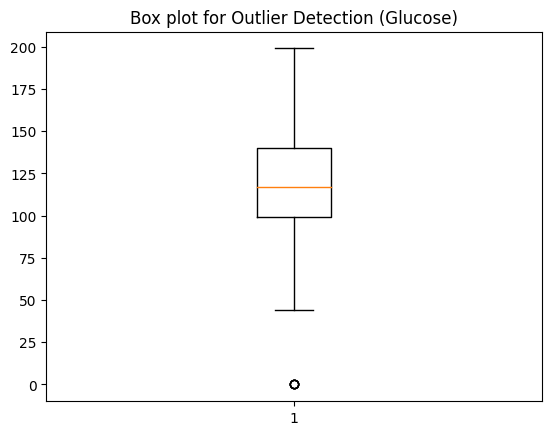

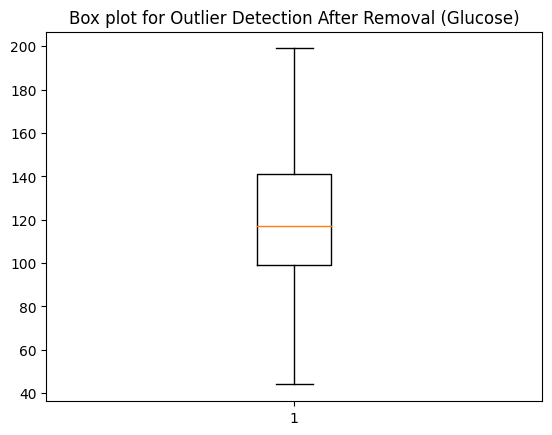

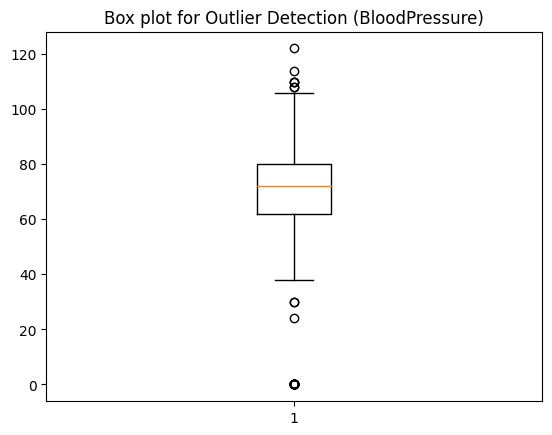

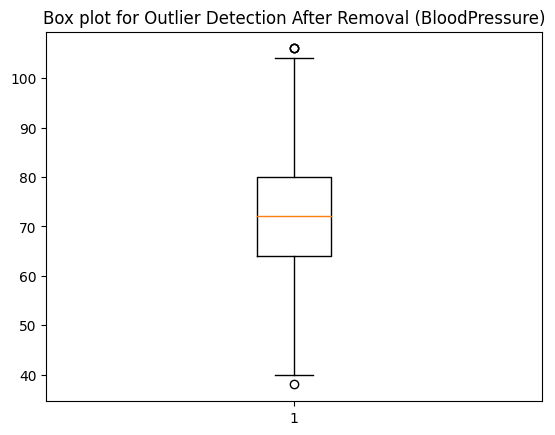

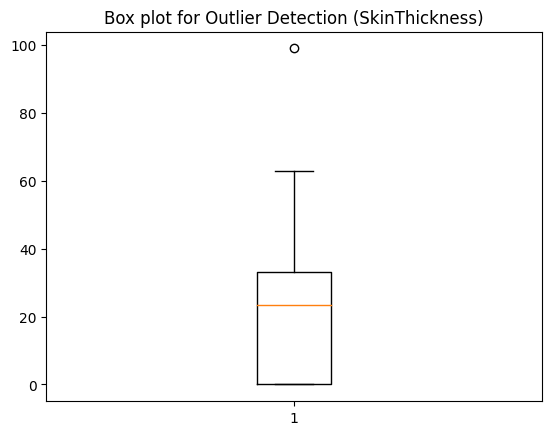

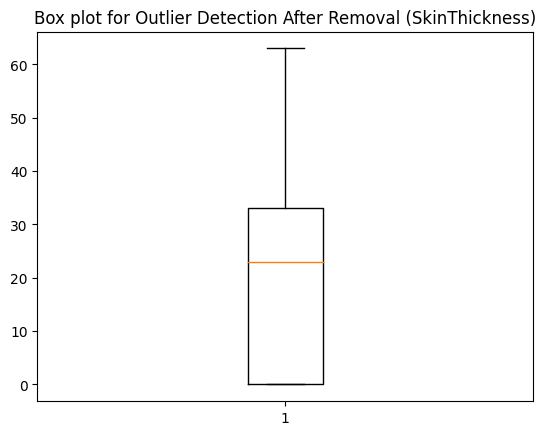

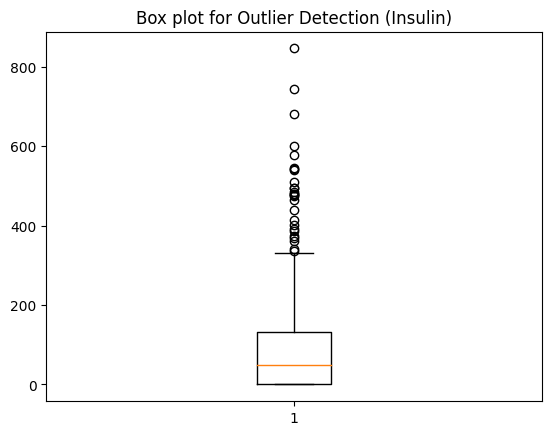

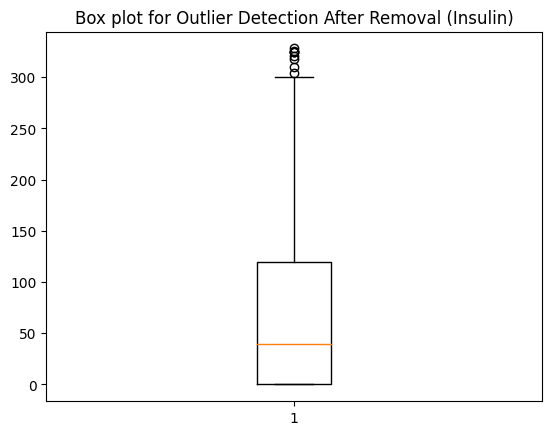

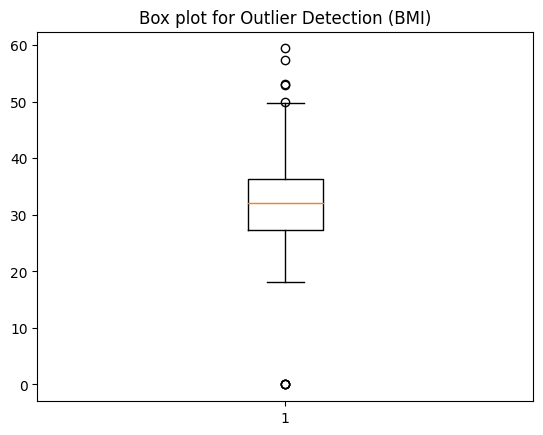

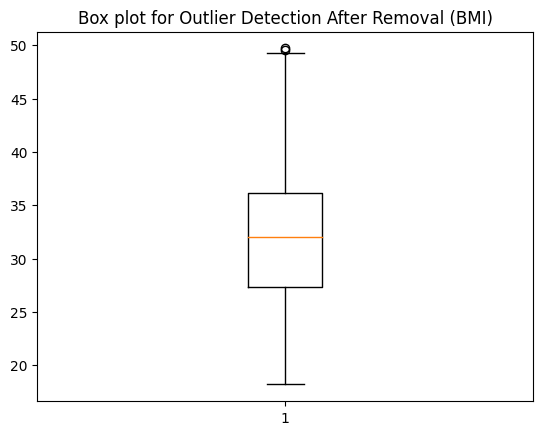

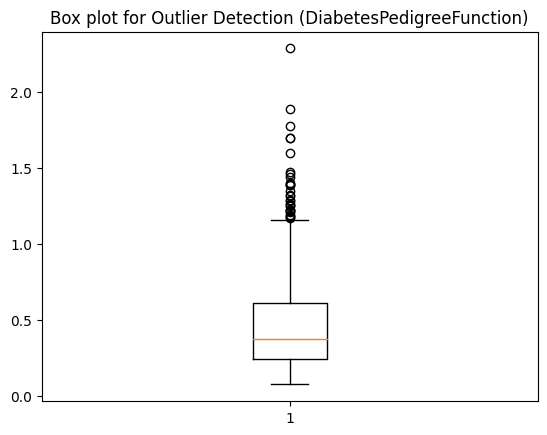

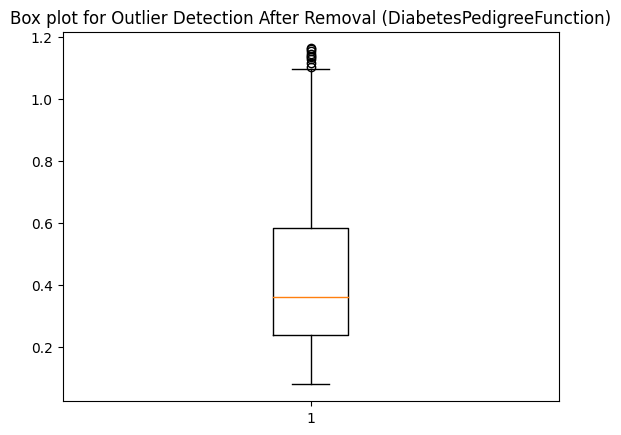

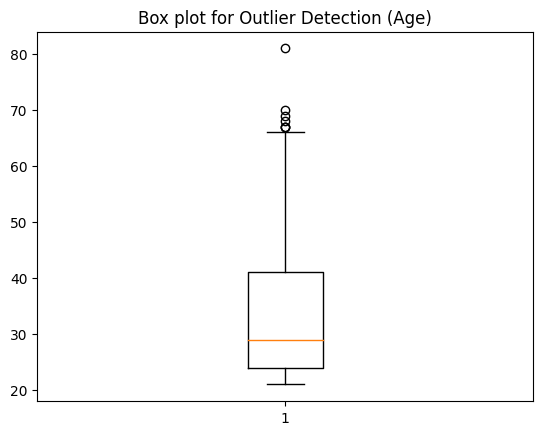

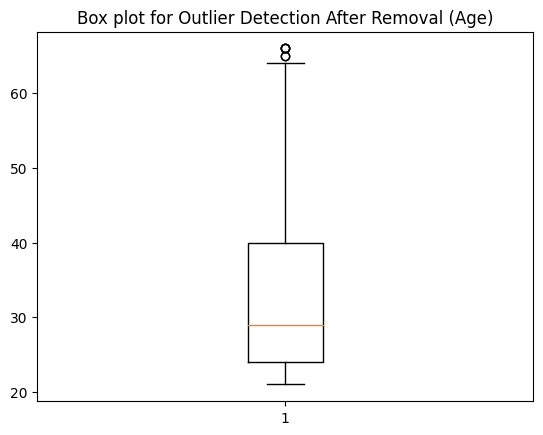

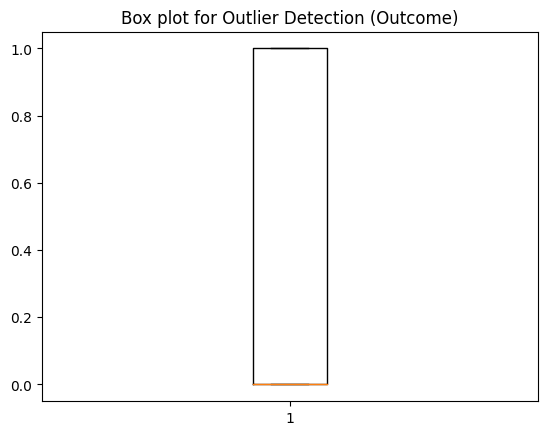

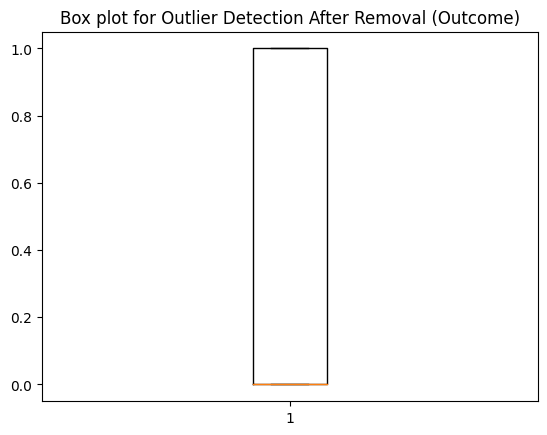

훈련 세트 크기: (386, 6)
검증 세트 크기: (129, 6)
테스트 세트 크기: (129, 6)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3842 - loss: 0.7317 - val_accuracy: 0.4496 - val_loss: 0.7201 - learning_rate: 1.0000e-04
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3732 - loss: 0.7305 - val_accuracy: 0.4651 - val_loss: 0.7180 - learning_rate: 1.0000e-04
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4301 - loss: 0.7244 - val_accuracy: 0.4651 - val_loss: 0.7162 - learning_rate: 1.0000e-04
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4223 - loss: 0.7241 - val_accuracy: 0.4806 - val_loss: 0.7146 - learning_rate: 1.0000e-04
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4521 - loss: 0.7208 - val_accuracy: 0.4884 - val_loss: 0.7133 - learning_rate: 1.0000e-04
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4354 - loss: 0.7223 - val_accuracy: 0.4884 - val_loss: 0.7117 - learning_rate: 1.0000e-04
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4631 - loss: 0.71

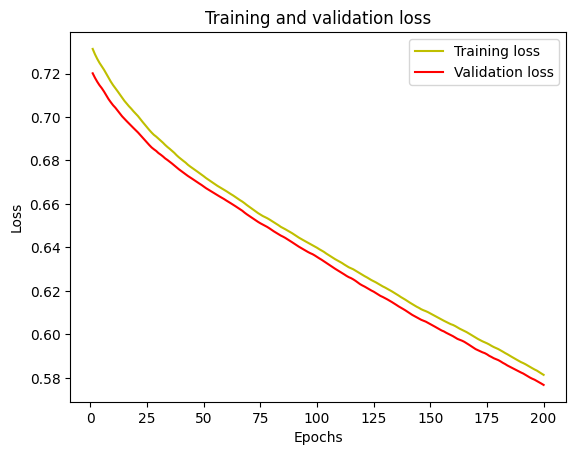

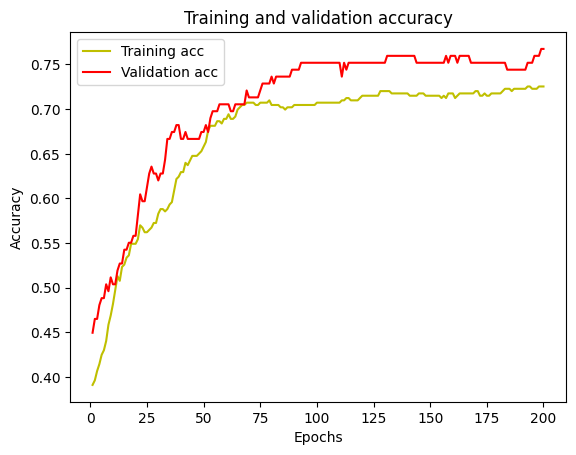

최종 훈련 정확도 : 0.7254
최종 검증 정확도 : 0.7674
테스트 세트 정확도 : 0.7132


In [8]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers


# 데이터 로드 및 결측값 확인
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv", index_col=0)
df = df.dropna()
print("결측값 확인:")
print(df.isnull().sum())

# 이상치 탐지 및 제거 함수 정의
def outlier(df, labels):
    for label in labels:
        # 박스 플롯을 이용해 이상치 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        # IQR 계산을 통한 이상치 경계 설정
        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치 제거
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

        # 이상치 제거 후 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection After Removal ({label})')
        plt.show()

    return df

# 사용할 레이블 리스트 정의
labels = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# 이상치 제거 후 데이터셋 반환
df_cleaned = outlier(df, labels)

# 설명 변수(X)와 타겟 변수(y) 분리
X = df_cleaned.drop(['Outcome'], axis=1)
# X = X1.drop(['Outcome'], axis=1)
y = df_cleaned['Outcome']

# 타겟 변수 원-핫 인코딩
y_onehot = to_categorical(y, num_classes=2)  # 2개의 클래스(0과 1)

# 데이터 전처리: 표준화
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)  # 수치형 데이터 표준화
    ])

X_processed = preprocessor.fit_transform(X)

# 데이터 분할 (훈련+검증 세트와 테스트 세트로 나누기)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)

# 모델 정의
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


model = keras.Sequential([
    layers.Dense(10,input_shape=(X_train.shape[1],),activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    # BatchNormalization(),
    # Dropout(0.3),
    layers.Dense(8,activation='relu'),
    # Dropout(0.3),
    # layers.Dense(8,activation='relu'),
    layers.Dense(6,activation='relu'),
    # Dropout(0.2),
    layers.Dense(2,activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=200, batch_size=64, validation_data=(X_val, y_val),callbacks=[early_stopping,reduce_lr])

# 모델 예측
y_pred = model.predict(X_test)

# 손실 그래프 시각화
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 최종 정확도 출력
train_acc = model_history.history['accuracy'][-1]
val_acc = model_history.history['val_accuracy'][-1]
print(f"최종 훈련 정확도 : {train_acc:.4f}")
print(f"최종 검증 정확도 : {val_acc:.4f}")

# 테스트 데이터 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 세트 정확도 : {test_acc:.4f}")


#3.  Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

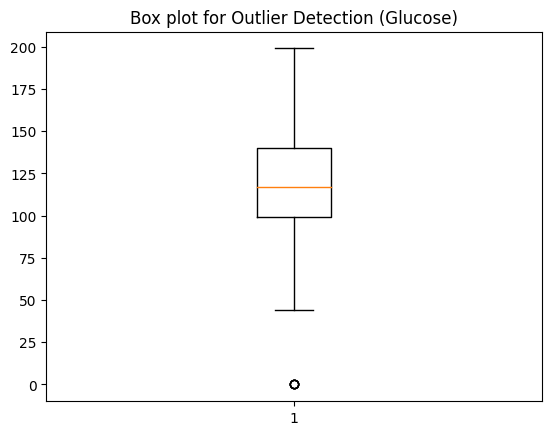

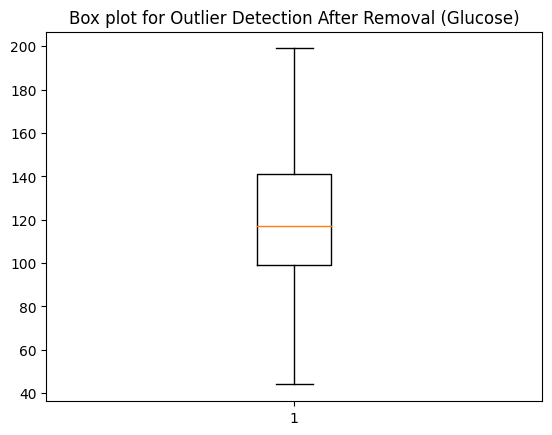

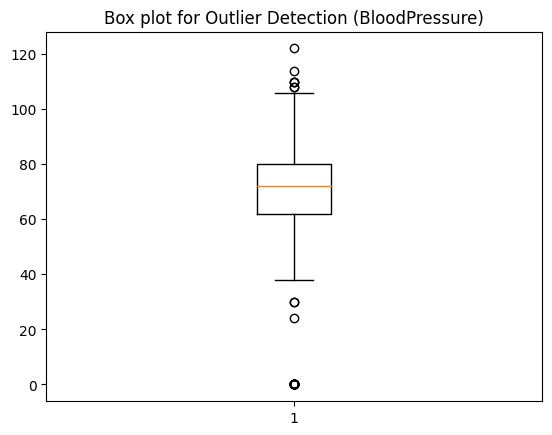

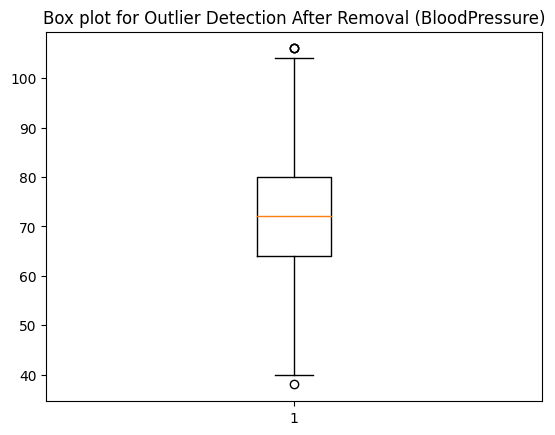

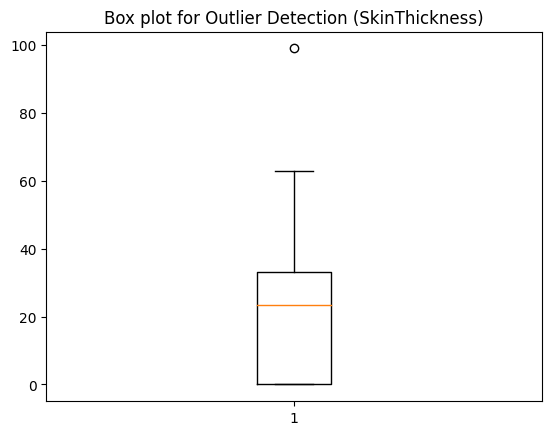

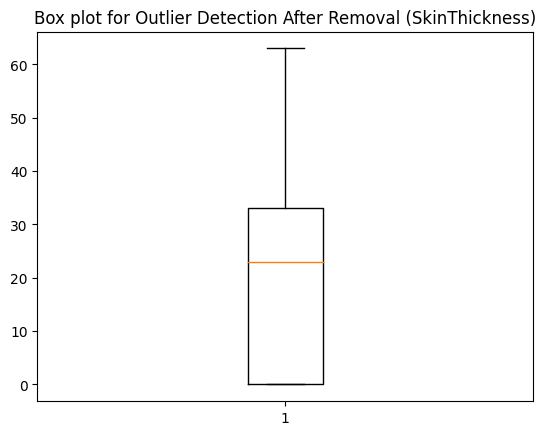

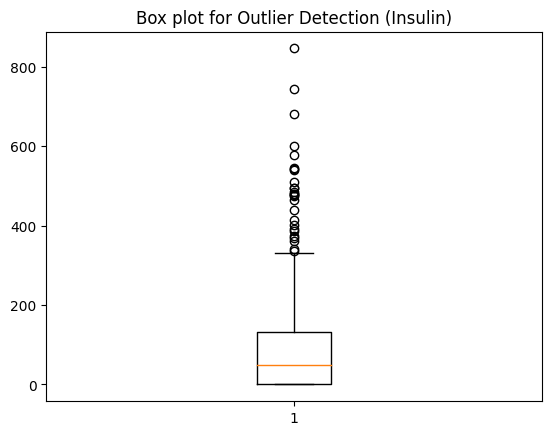

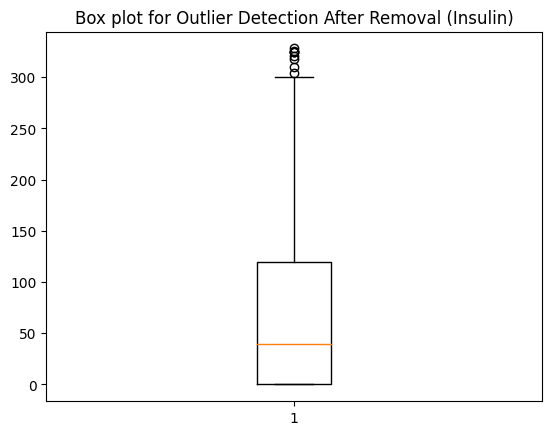

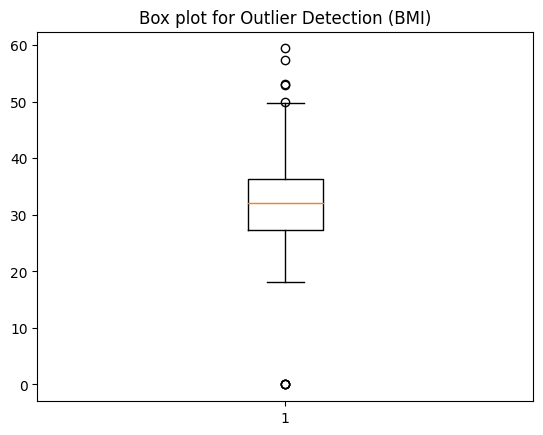

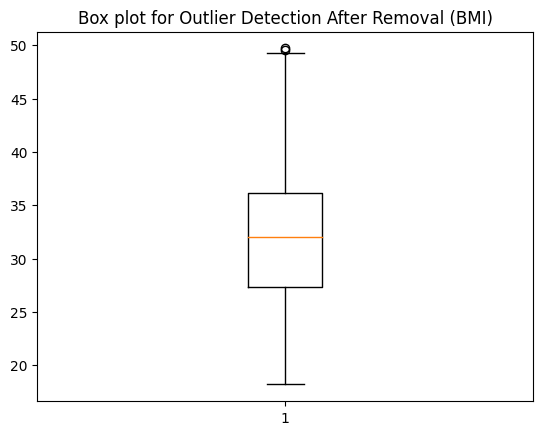

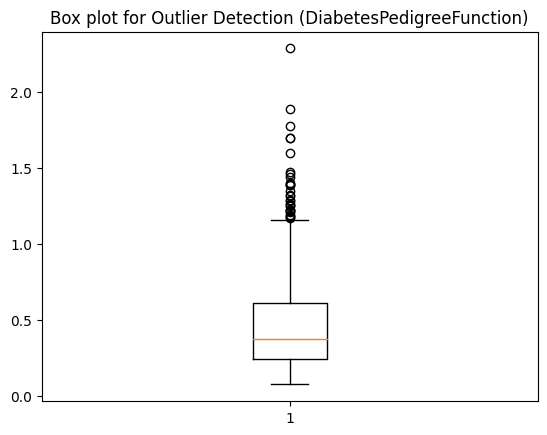

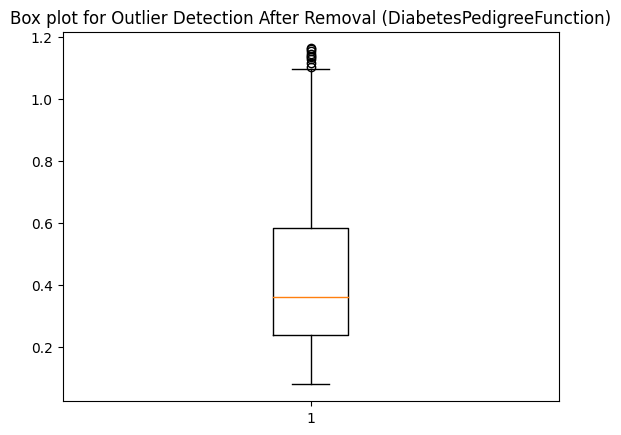

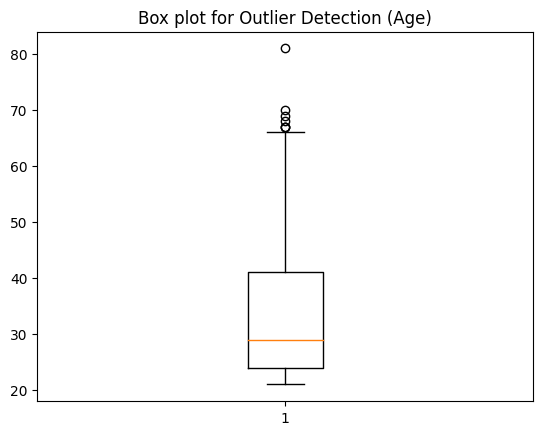

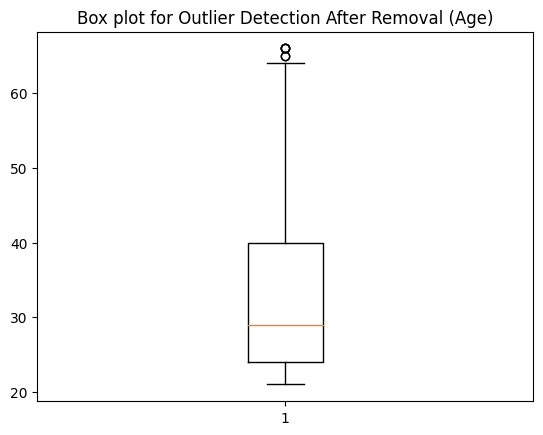

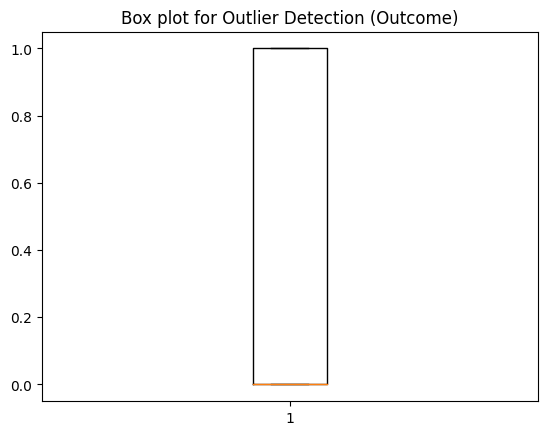

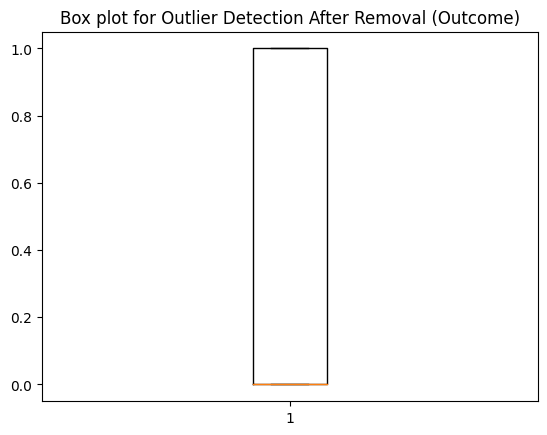

훈련 세트 크기: (386, 6)
검증 세트 크기: (129, 6)
테스트 세트 크기: (129, 6)
(386, 6) (386,)
(129, 6) (129,)
평균제곱근오차 28.17570600418825
평균제곱근오차 28.17570600418825
평균제곱근오차 28.17570600418826
평균제곱근오차 39.65488372093023
평균제곱근오차 24.36930168217055
평균제곱근오차 26.883506307595063


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


df = pd.read_csv("/content/drive/MyDrive/diabetes.csv", index_col=0)

# 이상치 탐지 및 제거 함수 정의
def outlier(df, labels):
    for label in labels:
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

        # 이상치 제거 후 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection After Removal ({label})')
        plt.show()

    return df

# 사용할 레이블 리스트 정의
labels = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# 이상치 제거 후 데이터셋 반환
df_cleaned = outlier(df, labels)

# 설명 변수(X)와 타겟 변수(y) 분리
X1 = df_cleaned.drop(['Outcome'], axis=1)
X = X1.drop(['BMI'],axis=1)
y = df_cleaned['BMI']


# 데이터 전처리: 표준화
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)  # 수치형 데이터 표준화
    ])

X_processed = preprocessor.fit_transform(X)

# 데이터 분할 (훈련+검증 세트와 테스트 세트로 나누기)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Linear_Regression

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

#Decision_tree

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

#Random_forest

model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

#SVM
model = SVR(kernel='linear')
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

결측값 확인:
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


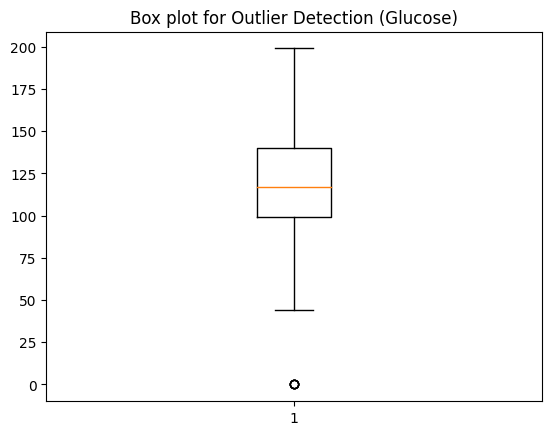

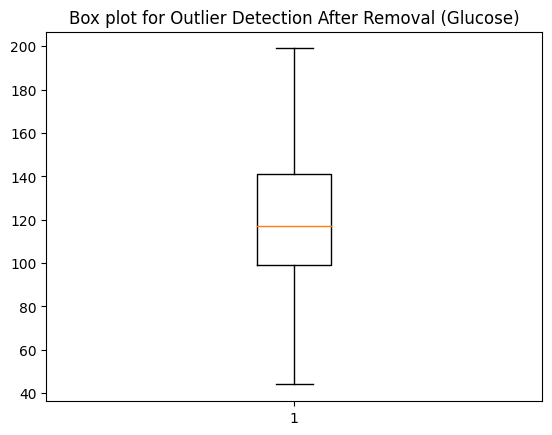

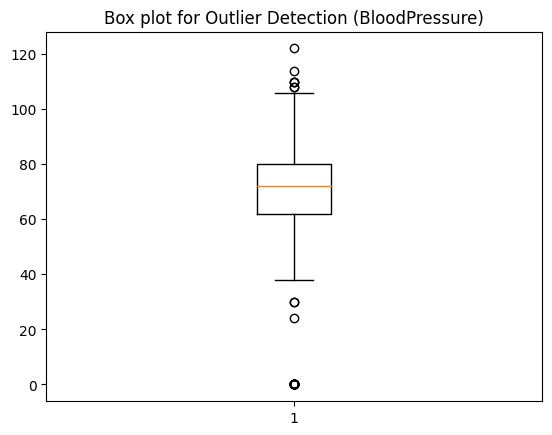

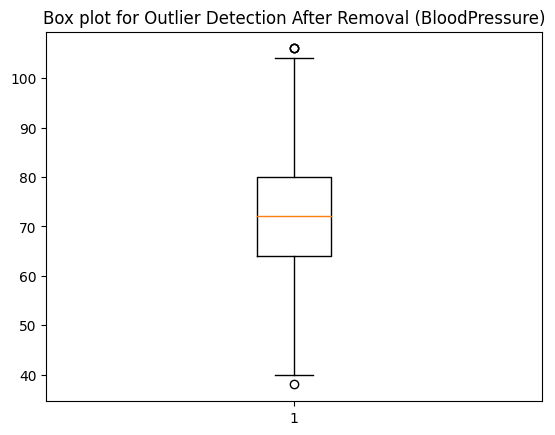

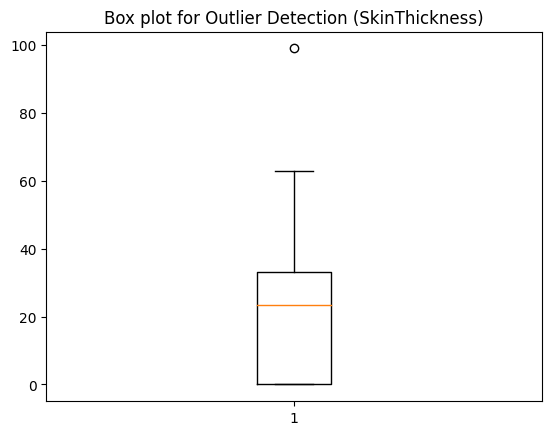

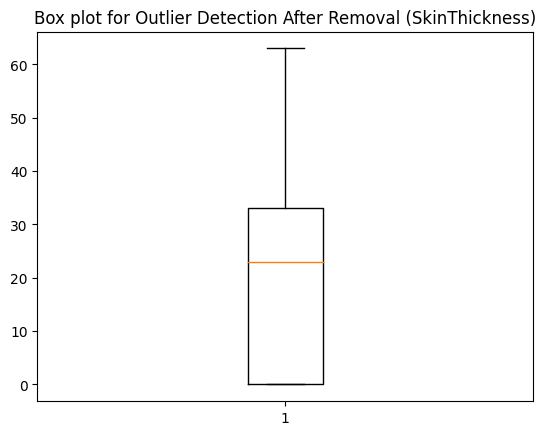

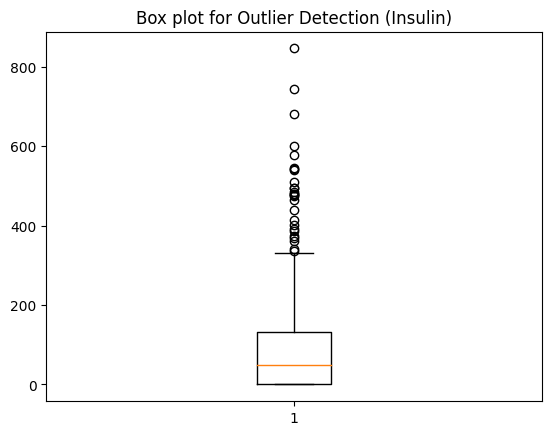

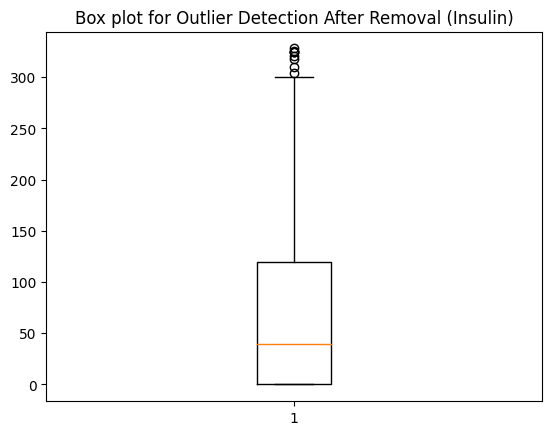

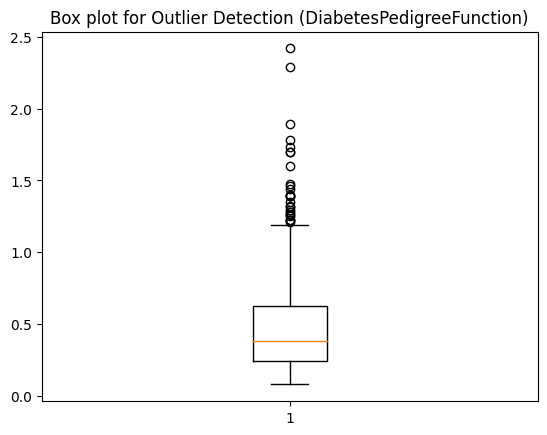

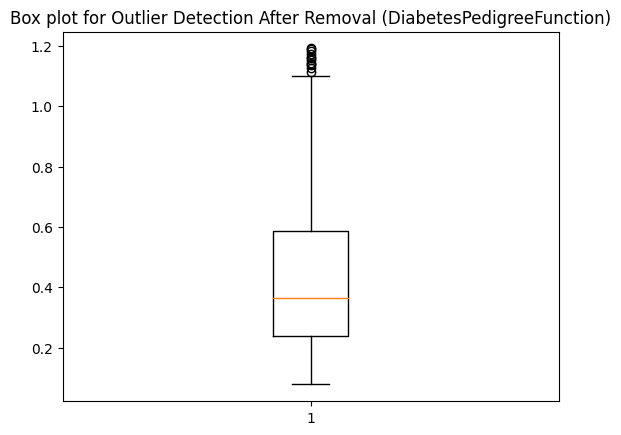

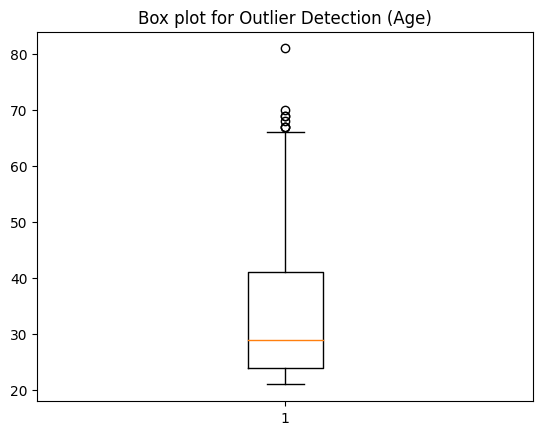

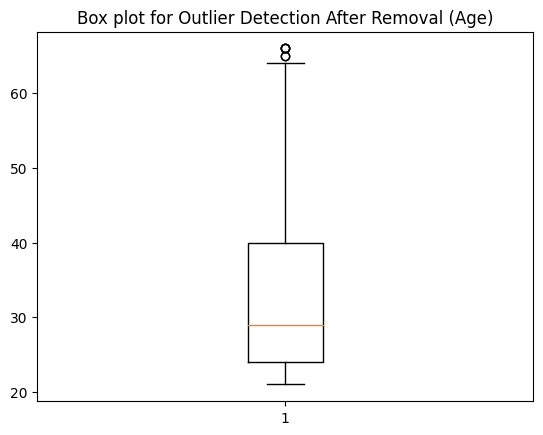

훈련 세트 크기: (392, 6)
검증 세트 크기: (131, 6)
테스트 세트 크기: (131, 6)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1099.8315 - mae: 32.5332 - val_loss: 1055.7772 - val_mae: 31.7592 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1105.2964 - mae: 32.5816 - val_loss: 1052.1622 - val_mae: 31.7043 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1066.5570 - mae: 31.9779 - val_loss: 1048.2958 - val_mae: 31.6454 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1063.5066 - mae: 31.9075 - val_loss: 1044.3962 - val_mae: 31.5863 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1052.1294 - mae: 31.7217 - val_loss: 1040.1136 - val_mae: 31.5213 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1047.0481 - mae: 31.6581 - val_loss: 1035.2926 - val_mae: 31.4487 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1042.5729 - mae: 31.6437 - val_loss: 1029.6458 - val_mae

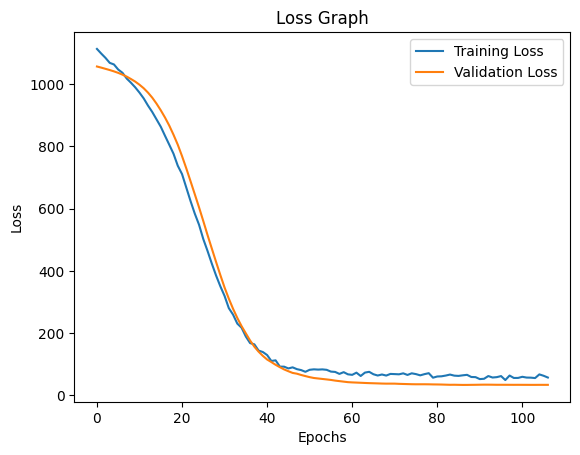

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.9996 - mae: 4.6720 
Test (loss)MSE: 40.14
Test MAE: 4.80


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 데이터 로드 및 결측값 확인
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv", index_col=0)
df = df.dropna()
print("결측값 확인:")
print(df.isnull().sum())

# 이상치 탐지 및 제거 함수 정의
def outlier(df, labels):
    for label in labels:
        # 박스 플롯을 이용해 이상치 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection ({label})')
        plt.show()

        # IQR 계산을 통한 이상치 경계 설정
        Q1 = df[label].quantile(0.25)
        Q3 = df[label].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치 제거
        df = df[(df[label] > lower_bound) & (df[label] < upper_bound)]

        # 이상치 제거 후 시각화
        plt.boxplot(df[label])
        plt.title(f'Box plot for Outlier Detection After Removal ({label})')
        plt.show()

    return df

# 사용할 레이블 리스트 정의
labels = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

# 이상치 제거 후 데이터셋 반환
df_cleaned = outlier(df, labels)

# 설명 변수(X)와 타겟 변수(y) 분리
X = df_cleaned.drop(['Outcome'], axis=1)  # 설명 변수로 'Outcome' 제외
y = df_cleaned['BMI']  # 타겟 변수로 'BMI' 설정

# 데이터 전처리: 표준화
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)  # 수치형 데이터 표준화
    ])

X_processed = preprocessor.fit_transform(X)

# 데이터 분할 (훈련+검증 세트와 테스트 세트로 나누기)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)

# Keras 모델 정의
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)  # 회귀 문제이므로 출력 노드 수는 1
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 모델 학습
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), batch_size=64, callbacks=[early_stopping, reduce_lr])

# 손실 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# 테스트 데이터로 모델 최종 평가
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test (loss)MSE: {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")
